<a href="https://colab.research.google.com/github/LetTech1/Previsao_De_Fraudes_Com_ML/blob/main/Analise_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Significado de cada coluna**
**step** → representa o tempo em que a transação ocorreu, medido em unidades de hora. Ex.: 1 significa hora 1, 24 significa um dia, 744 corresponde a 31 dias.

**type** → tipo de transação realizada. Os valores podem ser:

**CASH-IN** → depósito em conta

**CASH-OUT** → saque em dinheiro

**DEBIT** → transferência da carteira digital para conta bancária

**PAYMENT** → pagamento a comerciantes

**TRANSFER** → transferência entre usuários

**amount** → valor monetário da transação.

**nameOrig** → ID anônimo do cliente que iniciou a transação (origem).

**oldbalanceOrg** → saldo da conta do cliente de origem antes da transação.

**newbalanceOrig** → saldo da conta do cliente de origem após a transação.

**nameDest** → ID anônimo do cliente que recebeu a transação (destino).

**oldbalanceDest** → saldo da conta do cliente de destino antes da transação.

**newbalanceDest** → saldo da conta do cliente de destino após a transação.

**isFraud** → variável alvo principal: indica se a transação foi fraudulenta (1) ou não (0).

**isFlaggedFraud** → marca transações que foram automaticamente sinalizadas pelo sistema como suspeitas, geralmente quando o valor ultrapassa determinado limite.

##**KDD e Pré-Processamento**

In [ ]:
#biblioteca para gerar gráficos dinâmicos
!pip install plotly --upgrade

#pandas é uma biblioteca que trabalha com a importação de arquivos .csv
import pandas as pd
#numpy é uma biblioteca para a realização de operações em arrays
import numpy as np
#seaborn é uma biblioteca para vizualização de gráficos
import seaborn as sb
#matplotlib é também uma biblioteca para a geração de gráficos
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bd_frauds = pd.read_csv('/content/drive/MyDrive/TCC - Pos IFSP/Analise/Dados/AIML Dataset.csv')

In [ ]:
bd_frauds.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
bd_frauds.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
print(bd_frauds["step"].value_counts())

step
19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
706        4
721        4
693        4
112        2
662        2
Name: count, Length: 743, dtype: int64


In [ ]:
bd_frauds.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
#conta a quantidade de valores de cada item da coluna
np.unique(bd_frauds['step'],return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

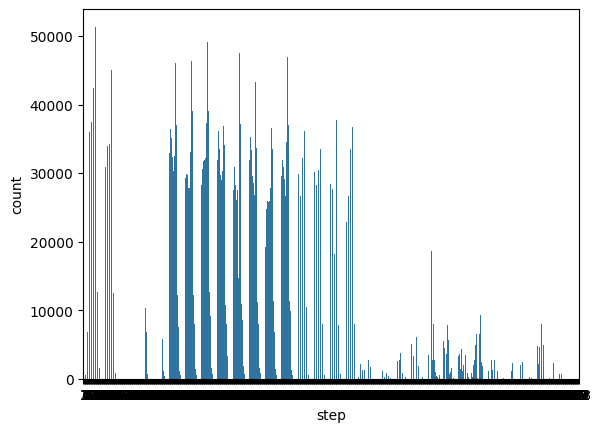

In [ ]:
#conta os registros e gera um gráfico
sb.countplot(x = bd_frauds['step']);

In [ ]:
bd_frauds.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
# Verificar a distribuição das classes
bd_frauds["isFraud"].value_counts(normalize=True)

,proportion
isFraud,
0,0.998709
1,0.001291


In [ ]:
bd_frauds["isFlaggedFraud"].value_counts(normalize=True)

,proportion
isFlaggedFraud,
0,0.999997
1,0.000003


In [ ]:
# Converter valores categóricos, para númericos, no modelo de Random Forest, vamos utilizar o Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bd_frauds["type_encoded"] = le.fit_transform(bd_frauds["type"])

print(bd_frauds[["type", "type_encoded"]].head())

       type  type_encoded
0   PAYMENT             3
1   PAYMENT             3
2  TRANSFER             4
3  CASH_OUT             1
4   PAYMENT             3


In [ ]:
# Criar dicionário com o mapeamento
mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("Legenda - type:")
for k, v in mapping.items():
    print(f"{k} -> {v}")

Legenda - type:
CASH_IN -> 0
CASH_OUT -> 1
DEBIT -> 2
PAYMENT -> 3
TRANSFER -> 4


In [ ]:
# Remover a coluna original "type"
bd_frauds = bd_frauds.drop("type", axis=1)

# Conferindo as colunas agora
print(bd_frauds.columns)

Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'type_encoded'],
      dtype='object')


In [ ]:
# Remover colunas que não ajudam diretamente
bd_frauds = bd_frauds.drop(["nameOrig", "nameDest"], axis=1)

print(bd_frauds.columns)  # para conferir

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_encoded'],
      dtype='object')


In [ ]:
# 1. Diferença esperada no saldo da origem
bd_frauds["diffOrig"] = bd_frauds["oldbalanceOrg"] - bd_frauds["amount"] - bd_frauds["newbalanceOrig"]

# 2. Diferença esperada no saldo do destino
bd_frauds["diffDest"] = bd_frauds["oldbalanceDest"] + bd_frauds["amount"] - bd_frauds["newbalanceDest"]

# 3. Proporção do valor da transação em relação ao saldo de origem
# quanto do saldo da origem a transação representa
# (+1 para evitar divisão por zero)
bd_frauds["percAmountOrig"] = bd_frauds["amount"] / (bd_frauds["oldbalanceOrg"] + 1)

# 4. Indicador de conta destino zerada antes ou depois
# 1 se a conta destino estava zerada antes/depois, 0 caso contrário
bd_frauds["isZeroDest"] = ((bd_frauds["oldbalanceDest"] == 0) | (bd_frauds["newbalanceDest"] == 0)).astype(int)

# Conferindo as novas colunas
print(bd_frauds[["diffOrig", "diffDest", "percAmountOrig", "isZeroDest"]].head())

   diffOrig  diffDest  percAmountOrig  isZeroDest
0       0.0   9839.64        0.057834           1
1       0.0   1864.28        0.087731           1
2       0.0    181.00        0.994505           1
3       0.0  21363.00        0.994505           1
4       0.0  11668.14        0.280788           1


**OBS:** Valores de diffDest ≠ 0 indicam inconsistência na atualização do saldo do destino. Essas inconsistências são muito frequentes em transações fraudulentas

## **Criando arquivo pkl**

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# Remove as colunas listadas entre [...]
# Ou seja, estou pegando todas as colunas do dataset, menos isFraud e isFlaggedFraud
# isFraud é justamente a variável alvo (y). Ela não pode estar dentro de X, porque é o que eu quero prever
# isFlaggedFraud → já indica se a transação foi sinalizada como suspeita, então seria “dar a resposta pronta” ao modelo
# x = bd_frauds.drop(["isFraud", "isFlaggedFraud"], axis=1)

# coluna alvo
# O que o modelo deve prever
# y = bd_frauds["isFraud"]

# 30% dos dados vão ser reservados para teste
# 70% restantes vão para treino
# stratify=y -> Isso é muito importante no meu caso, garante que a proporção de fraudes (1) e não fraudes (0) seja a mesma no treino e no teste.
# x_train, x_test, y_train, y_test = train_test_split(
# x, y, test_size=0.3, random_state=0, stratify=y
# )

In [ ]:
# import pickle

# Salvando em arquivo .pkl
# with open('fraudes.pkl', mode='wb') as f:
# pickle.dump([x_train, y_train, x_test, y_test], f)


## **Random Forest**

In [ ]:
import pickle
with open('/content/drive/MyDrive/TCC - Pos IFSP/Analise/Dados/fraudes.pkl', 'rb') as f:
    x_train, y_train, x_test, y_test = pickle.load(f)

In [ ]:
from sklearn.tree import DecisionTreeClassifier #biblioteca que trabalha com algortmos de árvores de decisão

# Instancia um classificador de Árvore de Decisão utilizando a métrica de
# entropia como critério para definir as divisões dos nós durante o treinamento do modelo.
arvoreD_fraudes = DecisionTreeClassifier(criterion = 'entropy')


In [ ]:
# Treina o classificador de Árvore de Decisão utilizando
# as variáveis de entrada (X_risco_credito) e os rótulos de saída (Y_risco_credito),
# ajustando o modelo para reconhecer padrões nos dados.
arvoreD_fraudes.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#retorna a importância de cada parâmetro na árvore
arvoreD_fraudes.feature_importances_

array([8.67332430e-04, 1.56107436e-03, 6.52075443e-05, 7.54505908e-01,
       2.15713985e-03, 6.84833577e-04, 0.00000000e+00, 2.14721034e-01,
       2.45587238e-02, 8.78746178e-04, 0.00000000e+00])

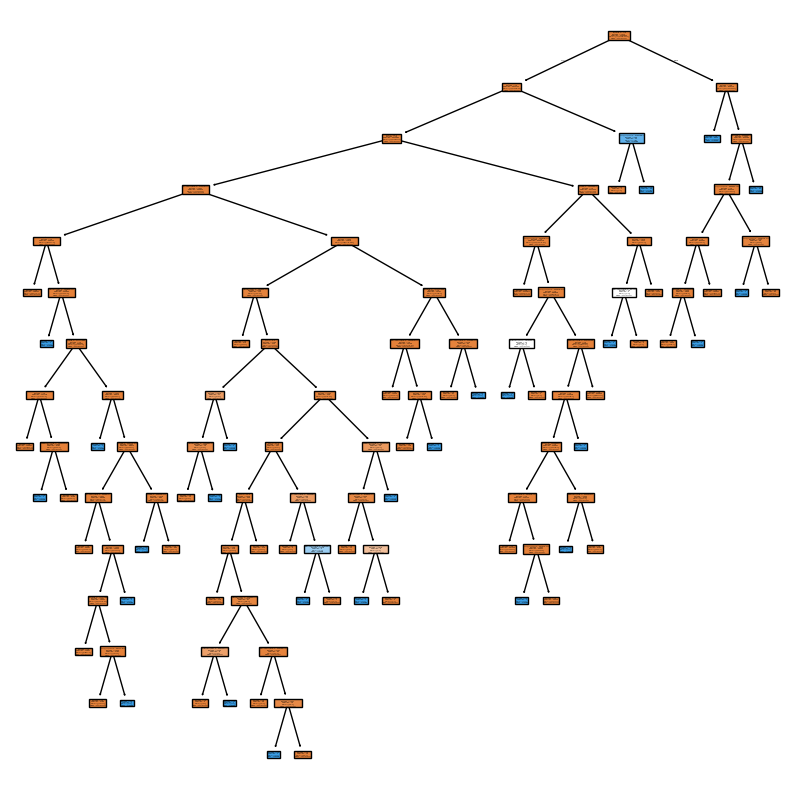

In [ ]:
#visualizar a árvore
from sklearn import tree
previsores = ['step', 'type_encoded', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
              'oldbalanceDest', 'newbalanceDest', 'diffOrig', 'diffDest',
              'percAmountOrig', 'isZeroDest']
figure, eixos = plt.subplots(nrows = 1, ncols = 1, figsize=(10,10))
tree.plot_tree(arvoreD_fraudes, feature_names=previsores, class_names=['Não Fraude', 'Fraude'], filled= True)

plt.show()

In [ ]:
print(list(x_train.columns))

['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'type_encoded', 'diffOrig', 'diffDest', 'percAmountOrig', 'isZeroDest']


In [ ]:
# gerar previsão
entrada = [
    [1, 1000, 5000, 4000, 200, 1200, 1, 1000, 1000, 0.2, 0],  # TRANSFER
    [2, 200, 1000, 800, 1500, 1700, 2, 200, 200, 0.25, 1]     # CASH-OUT
]

previsao = arvoreD_fraudes.predict(entrada)

# Mostrar resultados legíveis
resultado = ["Fraude" if p == 1 else "Não Fraude" for p in previsao]
print(resultado)

['Não Fraude', 'Não Fraude']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Isso cria e treina a árvore de decisão nos dados
from sklearn.tree import DecisionTreeClassifier

arvore_fraude = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_fraude.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Fazer a previsão com base nos dados de testes
previsao = arvore_fraude.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

#faz a comparação entre o que o algoritmo previu e o que a classe teste possui
accuracy_score(y_test, previsao)

In [ ]:
# Gera e exibe a matriz de confusão do classificador de Árvore de Decisão treinado (arvore_fraude),
# avaliando seu desempenho com os dados de treino (x_train, y_train) e teste (x_test, y_test)
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_fraude)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

|                          | **Previsto: 0 (Não Fraude)**                           | **Previsto: 1 (Fraude)**                        |
| ------------------------ | ------------------------------------------------------ | ----------------------------------------------- |
| **Real: 0 (Não Fraude)** | **1906312** (TN – acertos de não fraude)               | **10** (FP – modelo disse fraude, mas não era)  |
| **Real: 1 (Fraude)**     | **10** (FN – fraudes reais que o modelo deixou passar) | **2454** (TP – fraudes detectadas corretamente) |


In [ ]:
# Compara as previsões com os valores reais de teste
print(classification_report(y_test, previsao))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Treinamento e previsão
# Instancia e treina um classificador Random Forest com 80 árvores,
# utilizando a entropia como critério de divisão, para identificar fraudes a partir dos dados de treino.
random_forest_fraude = RandomForestClassifier(n_estimators = 80, criterion = 'entropy', random_state=0) #n_estimators é o número de árvores
random_forest_fraude.fit(x_train, y_train)

In [ ]:
#previsão
previsoes = random_forest_fraude.predict(x_test)

In [ ]:
accuracy_score(y_test, previsoes)

## **Aprendizado Bayesiano**

In [ ]:
# Criando variável para Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes_fraude = GaussianNB()

In [ ]:
naive_bayes_fraude.fit(x, y)

In [ ]:
#gerar previsao
historicos = [
    [5, 1000.0, 5000.0, 4000.0, 2000.0, 3000.0, 1, 1000.0, -1000.0, 0.2, 0],
    [10, 9000.0, 1000.0, -8000.0, 5000.0, 14000.0, 2, 17000.0, -9000.0, 9.0, 0],
    [120, 9500.0, 10000.0, 500.0, 0.0, 0.0, 1, 10000.0 - 9500.0 - 500.0, 0.0 + 9500.0 - 0.0, 9500.0/(10000.0+1), 1],
    [250, 4800.0, 5000.0, 200.0, 300.0, 5100.0, 4, 5000.0 - 4800.0 - 200.0, 300.0 + 4800.0 - 5100.0, 4800.0/(5000.0+1), 0],
    [48, 1200.0, 1500.0, 300.0, 0.0, 0.0, 4, 1500.0 - 1200.0 - 300.0, 0.0 + 1200.0 - 0.0, 1200.0/(1500.0+1), 1],
    [360, 20000.0, 21000.0, -500.0, 1000.0, 21000.0, 2, 21000.0 - 20000.0 - (-500.0), 1000.0 + 20000.0 - 21000.0, 20000.0/(21000.0+1), 0],
    [5, 7000.0, 7200.0, 200.0, 50.0, 7050.0, 1, 7200.0 - 7000.0 - 200.0, 50.0 + 7000.0 - 7050.0, 7000.0/(7200.0+1), 1]
]
previsao = naive_bayes_fraude.predict(historicos) # a função não retorna a probabilidade

# probabilidades associadas a cada previsão
probabilidades = naive_bayes_fraude.predict_proba(historicos)

print("Classes previstas:", previsao)
print("Probabilidades:\n", probabilidades)

## **SVM**

In [ ]:
#biblioteca para algoritmo SVM
from sklearn.svm import SVC

In [ ]:
# Reduzir o dataset para teste inicial
x_train_sample = x_train[:50000]
y_train_sample = y_train[:50000]

In [ ]:
# Criar a variável svm_fraude para trabalhar com o algoritmo SVM e configurar seus parâmetros
svm_fraude = SVC(kernel='rbf', random_state=1, C=2)
svm_fraude.fit(x_train_sample, y_train_sample) # função que realiza o treinamento

In [ ]:
x_test_sample = x_test[:50000]

In [ ]:
# previsões
previsao = svm_fraude.predict(x_test_sample)

In [ ]:
#faz a comparação entre o que o algoritmo previu e o que a classe teste possui
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y_test_sample = y_test[:50000]
accuracy_score(y_test_sample, previsao)

Fazendo com todos os dados

In [ ]:
svm_fraude = SVC(kernel='rbf', random_state=1, C=2)
svm_fraude.fit(x_train, y_train)

SVC(C=2, random_state=1)

In [ ]:
previsao = svm_fraude.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsao)

0.9992183513500204